In [3]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from google.colab import files

# Upload and load the data
print("Please upload the 'glass.csv' file.")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\\nSuccessfully loaded '{file_name}'.")


Please upload the 'glass.csv' file.


Saving glass.csv to glass.csv
\nSuccessfully loaded 'glass.csv'.


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB
\n\n--- Statistical Summary ---
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.73

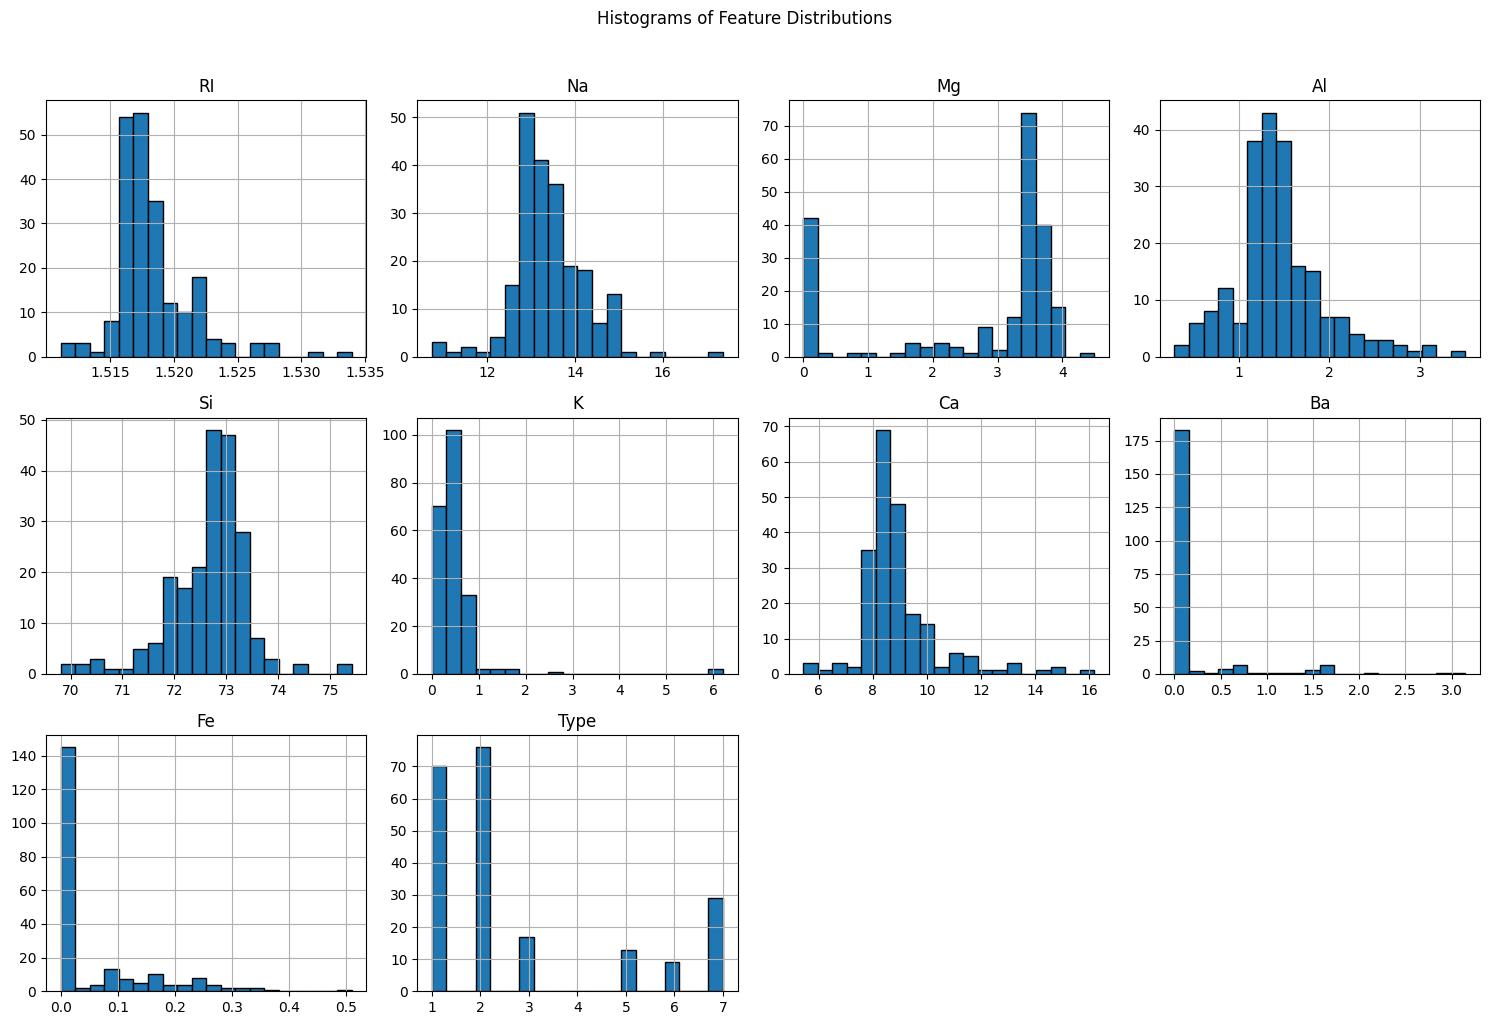

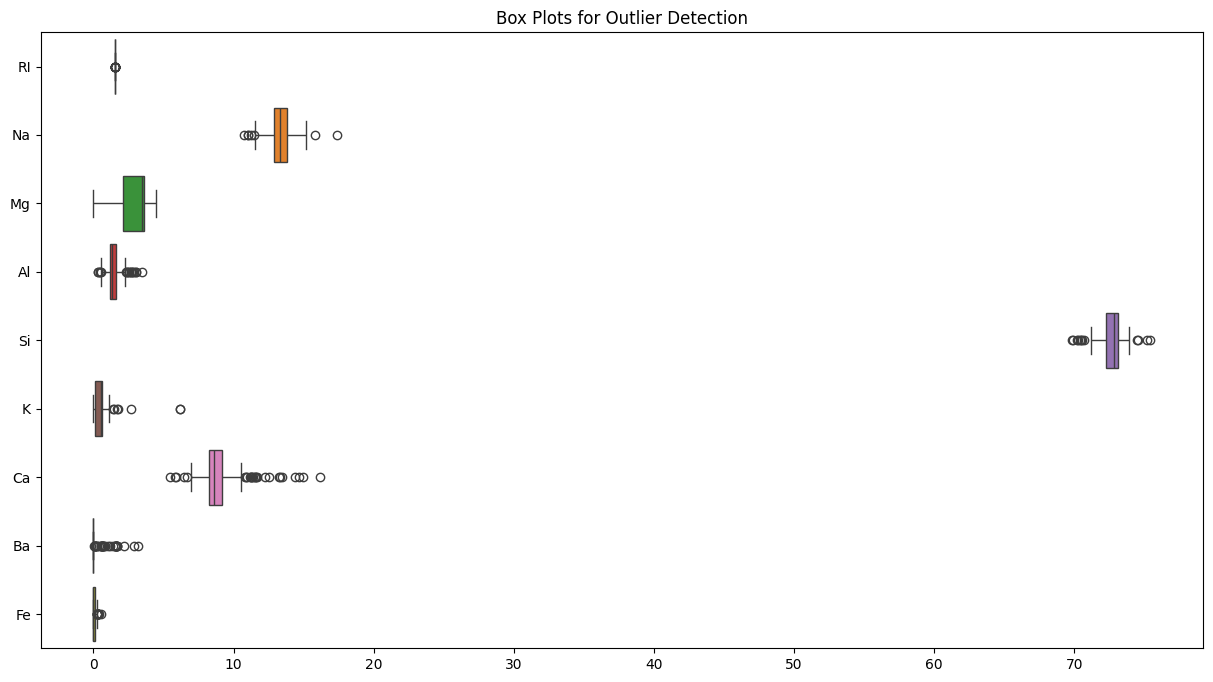

In [4]:
# ---Exploratory Data Analysis (EDA) ---

print("--- Dataset Information ---")
df.info()

print("\\n\\n--- Statistical Summary ---")
print(df.describe())

print("\\n\\n--- Distribution of Glass Types ---")
print(df['Type'].value_counts())

# Visualize the distributions
df.hist(bins=20, figsize=(15, 10), layout=(3, 4), edgecolor='black')
plt.suptitle('Histograms of Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('Type', axis=1), orient='h')
plt.title('Box Plots for Outlier Detection')
plt.show()


In [5]:
# ---Data Preprocessing & Splitting ---

#Clean Data: Remove rows where all values are missing
df.dropna(how='all', inplace=True)
print(f"Shape of the dataset after cleaning: {df.shape}")

# Define Features (X) and Target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# Scale Features: Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data: Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data successfully preprocessed and split.")
print(f"Training set size: {X_train.shape} samples")
print(f"Test set size: {X_test.shape} samples")


Shape of the dataset after cleaning: (214, 10)
Data successfully preprocessed and split.
Training set size: (171, 9) samples
Test set size: (43, 9) samples


In [6]:
# --- Model Training and Evaluation ---

# Initialize a dictionary to store the results
results = {}

# --- Model 1: Random Forest ---
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, rf_pred, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, rf_pred, average='weighted')
}
print("Random Forest model trained.")


# --- Model 2: Bagging ---
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)
bagging_pred = bagging_clf.predict(X_test)
results['Bagging (Decision Tree)'] = {
    'Accuracy': accuracy_score(y_test, bagging_pred),
    'Precision': precision_score(y_test, bagging_pred, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, bagging_pred, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, bagging_pred, average='weighted')
}
print("Bagging model trained.")


# --- Model 3: Gradient Boosting ---
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_clf.fit(X_train, y_train)
boosting_pred = boosting_clf.predict(X_test)
results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, boosting_pred),
    'Precision': precision_score(y_test, boosting_pred, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, boosting_pred, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, boosting_pred, average='weighted')
}
print("Gradient Boosting model trained.")


Random Forest model trained.
Bagging model trained.
Gradient Boosting model trained.


In [7]:
# ---Compare Results ---

# Convert the results dictionary to a DataFrame for nice formatting
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("--- Final Model Comparison ---")
print(results_df)

print("\\n--- Detailed Report for the Best Model ---")
# Assuming Gradient Boosting is the best, we use 'boosting_pred'.
# If another model is better, you can swap it with 'rf_pred' or 'bagging_pred'.
print(classification_report(y_test, boosting_pred, zero_division=0))


--- Final Model Comparison ---
                         Accuracy  Precision    Recall  F1-Score
Gradient Boosting        0.813953   0.821636  0.813953  0.811357
Bagging (Decision Tree)  0.790698   0.794616  0.790698  0.788934
Random Forest            0.744186   0.749925  0.744186  0.739696
\n--- Detailed Report for the Best Model ---
              precision    recall  f1-score   support

         1.0       0.83      0.71      0.77        14
         2.0       0.81      0.87      0.84        15
         3.0       0.67      0.67      0.67         3
         5.0       1.00      0.67      0.80         3
         6.0       0.67      1.00      0.80         2
         7.0       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.80        43
weighted avg       0.82      0.81      0.81        43



**1. Explain Bagging and Boosting methods. How is it different from each other.**

Bagging (like a Random Forest) builds many independent models in parallel on different random samples of your data. It then combines their predictions through voting or averaging. Its main goal is to reduce a model's variance and prevent overfitting.

Boosting (like Gradient Boosting) builds models sequentially, where each new model focuses on correcting the mistakes made by the previous one. It turns a group of weak models into a single, strong model. Its main goal is to reduce a model's bias.

In short Bagging uses a parallel, democratic approach, while Boosting uses a sequential, team-based approach where each member learns from the last.

**2. Explain how to handle imbalance in the data.**

When one class in your data is very rare, models can become biased and ignore it. To handle this, you can

Resample the data: Either create more samples of the minority class (over-sampling) or remove samples from the majority class (under-sampling).

Use class weights: Adjust the model's algorithm to penalize mistakes on the minority class more heavily, forcing it to pay more attention. This is what class_weight='balanced' does.

Use better metrics: Evaluate performance with Precision, Recall, and F1-score instead of just accuracy, as accuracy can be misleading.